In [37]:
#Import all libraries here
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [38]:
#Extract the dataset from the zip_file
zf = zipfile.ZipFile('creditcard.zip') 
data_set = pd.read_csv(zf.open('creditcard.csv'))

In [39]:
print(data_set)
print(data_set.shape)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [40]:
#First 5 rows of data_set
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
#The dataset comprises of 284807 transactions, with the features V1, V2, V3, V4, ..., V28 that are obtained using PCA(Principal Component Analysis).
#Time column is the feature that indicates the duraction between every transaction occuring and the first transaction.
#Amount column is the feature that contains the transacted amount.
#Class contains either 0 or 1, where 1 is referred to fraud and 0 for no fraud.

In [42]:
#Understand the mean, count, standard_deviation and median(25th, 50th, 75th percentile of dataset)
data_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [43]:
#Now we need to find the number of fraud transactions and number of genuine transactions

In [44]:
genuine = data_set[data_set["Class"] == 0]
fraud = data_set[data_set["Class"] == 1]

In [45]:
print("Number of Genuine transactions = ",genuine.Class.value_counts()[0])
print("Number of fraudulent transactions = ",fraud.Class.value_counts()[1])

Number of Genuine transactions =  284315
Number of fraudulent transactions =  492


In [46]:
# Lets see a sns plot between fraud and genuine transactions

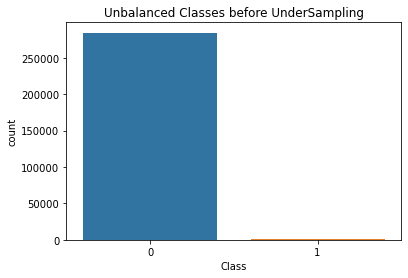

In [47]:
sns.countplot(x = "Class", data = data_set)
plt.title("Unbalanced Classes before UnderSampling")
plt.show()

In [48]:
#Very huge difference between number of genuine and fraudulent transactions in respect to the classes as seen from the count and sns countplot.
#That means dataset is very much imbalanced, but what is imbalanced dataset?
#Imbalanced Dataset = Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

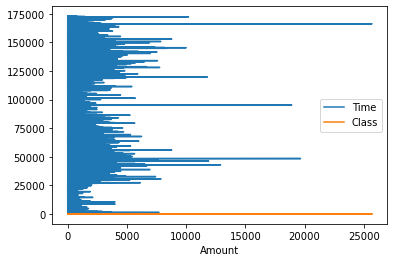

In [54]:
data_set.plot(x="Amount", y=["Time", "Class"])
plt.show()

In [50]:
# From the above plot, it clearly indicates that all V-features scaled, but [Time and Amount] isn't scaled.
# So scaling them is first priority.
# Then once its scaled, they have to be dropped from the dataset.
# Then we can move forward for either oversampling/undersampling.

In [55]:
# We are using MinMax scaler to scale the two features Amount and Time based on the minimum and maximum value.
# From the above plot we clearly saw the amount ranges between [0-25000], whereas Time ranges between [0-175000]
# To undermine this data, we though of a way to eliminate the median values, instead consider the minimum and maximum values of the dataset.

In [56]:
minmax_scale = MinMaxScaler()

data_set['scaled_amount']=minmax_scale.fit_transform(data_set['Amount'].values.reshape(-1,1))
data_set['scaled_Time']=minmax_scale.fit_transform(data_set['Time'].values.reshape(-1,1))

data_set.drop(['Amount','Time'], axis=1,inplace=True)

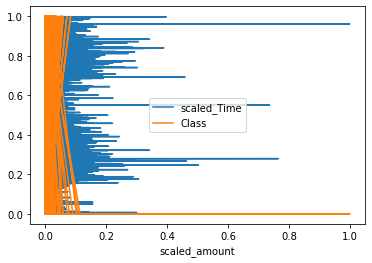

In [57]:
data_set.plot(x="scaled_amount", y=["scaled_Time", "Class"])
plt.show()

In [58]:
# So now, this looks good we have both the features [Time and Amount] in range between [0-1].
# That means we can move ahead for Sampling techniques.
# But in our case, we have 492 fraud cases and 284315 genuine cases.
# In our opinion, undersampling would be much easier and feasible.

In [59]:
# First, we will shuffle the whole dataset with random state =4
# Extract fraud ones onto a different dataset fraud_dataset
# In the fraud we have 492 observations.
# Now we have to select 492 random observations from 284315 genuine observations as non_fraud_dataset.
# Then concat both fraud_dataset and non_fraud_dataset into normalized one.

In [63]:
# Shuffle the Dataset.
shuffled_data_set = data_set.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_data_set = shuffled_data_set.loc[shuffled_data_set['Class'] == 1]

#Randomly select 492 observations from the genuine (majority class)
genuine_data_set = shuffled_data_set.loc[shuffled_data_set['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_data_set = pd.concat([fraud_data_set, genuine_data_set])

In [64]:
# Lets see a sns plot between fraud and genuine transactions after scaling Time and amount

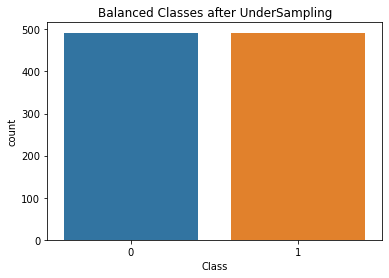

In [65]:
sns.countplot(x = "Class", data = normalized_data_set)
plt.title("Balanced Classes after UnderSampling")
plt.show()